# Principle Component Analysis on MNIST Data

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [18]:
data = mnist.load_data()

(X_train, y_train), (X_test, y_test) = data
X_train.shape = (X_train.shape[0], -1)
X_test.shape = (X_test.shape[0], -1)

In [19]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
pca = PCA(0.96)
pca.fit(X_train)

PCA(n_components=0.96)

In [8]:
#X_train = pca.transform(X_train)
#X_test = pca.transform(X_test)

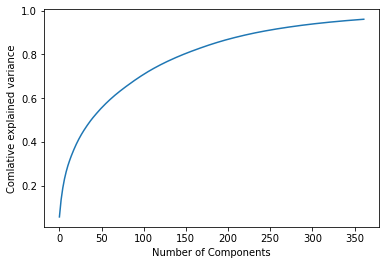

In [30]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Comlative explained variance')
plt.show()

In [21]:
modelWithoutPCA = LogisticRegression()
modelWithoutPCA.fit(X_train, y_train)
modelWithoutPCA.score(X_test, y_test)

0.9246

In [22]:
modelWithPCA = LogisticRegression()
modelWithPCA.fit(pca.transform(X_train), y_train)
modelWithPCA.score(pca.transform(X_test), y_test)

0.9272

In [26]:
X_test.shape, pca.transform(X_test).shape

((10000, 784), (10000, 2))